# Scrapping: 

In [1]:
#On importe les librairies importantes: 
import os
import csv
import requests
from bs4 import BeautifulSoup
import time
from selenium import webdriver
import pandas as pd
import numpy as np

In [2]:
#Ici on identifie la page web que l'on veut scrapper a l'aide de beautifulsoup: 
requete = requests.get("https://www.imdb.com/chart/top/?ref_=nv_mv_250")
page = requete.content
soup = BeautifulSoup(page)

In [3]:
#On définit une fonction qui retourne le code HTMl d'une page web: 
def get_html_from_link(page_link):
    
    html = requests.get(page_link)
    soup = BeautifulSoup(html.text, 'html.parser')
    return soup

In [4]:
#On définit une fonction qui range dans une liste les liens des films:
#On recherche parmis tous les href ceux qui contiennent "/title/" et on les ajoute a la liste des liens:
def get_links_to_movies(soup):
  movies_links = []
  all_href = soup.find_all("a", href=True)
  for element in all_href:
    if "/title/" in element["href"]:
      movies_links.append(element["href"])
  return movies_links
movies_links = get_links_to_movies(soup)
movies_links


['https://www.imdb.com/search/title/?count=100&groups=oscar_best_picture_winners&sort=year%2Cdesc&ref_=nv_ch_osc',
 '/title/tt0111161/',
 '/title/tt0111161/',
 '/title/tt0068646/',
 '/title/tt0068646/',
 '/title/tt0468569/',
 '/title/tt0468569/',
 '/title/tt0071562/',
 '/title/tt0071562/',
 '/title/tt0050083/',
 '/title/tt0050083/',
 '/title/tt0108052/',
 '/title/tt0108052/',
 '/title/tt0167260/',
 '/title/tt0167260/',
 '/title/tt0110912/',
 '/title/tt0110912/',
 '/title/tt0120737/',
 '/title/tt0120737/',
 '/title/tt0060196/',
 '/title/tt0060196/',
 '/title/tt0109830/',
 '/title/tt0109830/',
 '/title/tt0137523/',
 '/title/tt0137523/',
 '/title/tt1375666/',
 '/title/tt1375666/',
 '/title/tt0167261/',
 '/title/tt0167261/',
 '/title/tt0080684/',
 '/title/tt0080684/',
 '/title/tt0133093/',
 '/title/tt0133093/',
 '/title/tt0099685/',
 '/title/tt0099685/',
 '/title/tt0073486/',
 '/title/tt0073486/',
 '/title/tt0114369/',
 '/title/tt0114369/',
 '/title/tt0047478/',
 '/title/tt0047478/',
 '/ti

In [6]:
#Dans cette fonction nous rangons les notes des différents films dans une liste 
#On range ensuite cette liste dans un tableau a l'aide de pandas:
def collecte_rating(soup):
    
#On recherche parmis les balises "td" celles qui contiennent une classe "ratingColumn imdbRating" qu'on ajoute dans la liste de notes: 
   
    movies_rating = []
    for element in soup.find_all('td', {"class" : "ratingColumn imdbRating"}):
        movies_rating.append(element.text)

    df_rating = pd.DataFrame({"movies_rating" : movies_rating})
    df_rating = df_rating.replace('\n','', regex=True)
    return df_rating

In [7]:
df_rating = collecte_rating(soup)
#Affichage de df_rating
df_rating

,movies_rating
0,9.2
1,9.2
2,9.0
3,9.0
4,8.9
...,...
245,8.0
246,8.0
247,8.0
248,8.0


In [8]:
def collecte_titles_links(soup):

#Nous rangeons dans une liste les liens et les titres des films
#On recherche parmis tous les href ceux qui contiennent "/title/"
#Ceux qui le contiennent sont ajoutés à la liste

    url = "https://www.imdb.com/"
    movies_titles = []
    movies_links = []
    indication = '/title/'
    for element in soup.find_all('a'):
        ref = str(element.get("href"))
        if indication in ref:
          movies_titles.append(element.text)
          movies_links.append(url+ref)
        print(movies_titles)
        print(movies_links)

#Le nan est une constante qui indique que la valeur donnée n’est pas légale - Not a Number

    movies_titles = [np.nan if x == ' \n' else x for x in movies_titles]

#Utilisation de pandas afin de mettre les valeurs obtenues dans un tableau

    df_titles = pd.DataFrame({"movies_titles": movies_titles, "movies_links": movies_links})

#Initialisation de l'index

    df_titles = df_titles.dropna().reset_index()
    df_titles = df_titles.drop([0], axis=0)
    df_titles = df_titles.drop("index", axis = 1)

    return df_titles

In [9]:
df_titles = collecte_titles_links(soup)
df_titles

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,movies_titles,movies_links
1,Les Évadés,https://www.imdb.com//title/tt0111161/
2,Le Parrain,https://www.imdb.com//title/tt0068646/
3,The Dark Knight : Le Chevalier noir,https://www.imdb.com//title/tt0468569/
4,"Le Parrain, 2ᵉ partie",https://www.imdb.com//title/tt0071562/
5,12 Hommes en colère,https://www.imdb.com//title/tt0050083/
...,...,...
246,Aladdin,https://www.imdb.com//title/tt0103639/
247,La couleur des sentiments,https://www.imdb.com//title/tt1454029/
248,La Belle et la Bête,https://www.imdb.com//title/tt0101414/
249,Danse avec les loups,https://www.imdb.com//title/tt0099348/


In [10]:
#Ici on instancie une fonction qui retrourne le pays d'origine d'un film depuis sont liens:
def extract_country(movie_html):

    country=[]
    for link in movie_html.find_all("a"):
        try:

#Si "country_of_origin" est dans un lien href alors il est ajouté à la liste "country"
            if 'country_of_origin' in  link["href"]:
                country.append(link.text)
        except KeyError:
            pass
    return(country)

In [11]:
#On applique la fonction "extract_country" a chaque film, qu'on stock dans la liste "country"
#On obtiens donc une liste de tout les pays de chaque films étudié: 
m=0
country = []
for url in df_titles["movies_links"]:
    movie_html = get_html_from_link(url)
    country.append(extract_country(movie_html))
    m += 1
    print(m)
    
print(country)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
[['United States'], ['United States'], ['United States', 'United Kingdom'], ['United States'], ['United Stat

In [12]:
#On instancie une fonction "extract_budget" qui donnce le budget d'un film a partir de son lien: 
def extract_budget(movie_url):
    reponse=requests.get(movie_url)
    doc=BeautifulSoup(reponse.text,"html.parser")
    budget = doc.find_all("span", {"class" : "ipc-metadata-list-item__list-content-item"})[4]
    montant=""
    #On compose le budget chiffre par chiffre dans une chaine de caractére, qu'on retourne en tant qu'entier:
    for i in str(budget.text):
        if i == "0" or i == "1" or i=="2" or i=="3" or i=="4" or i=="5" or i=="6" or i=="7" or i=="8" or i=="9":            
            montant = montant + str(i)
    return(int(montant))

url= "https://www.imdb.com/title/tt0120689/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=1a264172-ae11-42e4-8ef7-7fed1973bb8f&pf_rd_r=PXCXPEWCZSQ2BKAZPN8M&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_26"
print(extract_budget(url))


60000000


In [13]:
#On applique lafonction "extract_budget" a tout les film: 
#On stock les résultat dans la liste "budget" qui cotiens donc les budgets des 250 films de notre data: 
budget = []
m=0
for url in df_titles["movies_links"]:
    m+=1
    print(m)
    budget.append(extract_budget(url))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250


IndexError: list index out of range

In [20]:
#On ajoute un budget pour le dernier film qui n'en posséde pas:
budget.append(517975)
#On converti les prix de cetains films en dollards Américain:
budget[127] = 8988000
budget[243] = 7844000
budget[20] = 977500
print(budget)

[25000000, 6000000, 185000000, 13000000, 350000, 22000000, 94000000, 8000000, 93000000, 1200000, 55000000, 63000000, 160000000, 94000000, 18000000, 63000000, 25000000, 3000000, 33000000, 125000000, 977500, 19000000, 3300000, 70000000, 20000000, 60000000, 11000000, 165000000, 102000000, 19000000, 19000000, 806947, 35000000, 115000000, 11400000, 45000000, 103000000, 20000000, 6000000, 90000000, 40000000, 950000, 3300000, 9500000, 1500000, 15222, 5000000, 516962, 1000000, 11000000, 1500000, 5000000, 9000000, 31500000, 18000000, 100000000, 180000000, 2000000, 1752000, 935000, 19000000, 2000000, 3000000, 321000000, 501305, 18500000, 15000000, 1800000, 250000000, 90000000, 55000000, 3000000, 72000000, 18000000, 30000000, 175000000, 32000000, 70000000, 2400000000, 30000000, 356000000, 10000000, 4500000, 200000000, 2540800, 370000000, 550000000, 32500000, 12000000, 1200000, 20000000, 46808, 839727, 4000000, 15000000, 3800000, 35566, 3101000, 2479000, 10000000, 2200000, 16053, 30000000, 927262,

In [15]:
#Dans cette fonction on retourne une liste de tout les acteurs qui on jouer dans un film spécifique:(a partie de son lien)
def extract_actors(movie_url):
    actors = []
    reponse=requests.get(movie_url)
    doc=BeautifulSoup(reponse.text,"html.parser")
    for i in doc.find_all("a",{"class" : "sc-18baf029-1 gJhRzH"}):
        actors.append(i.text)
    return(actors)

In [16]:
#On applique lafonction "extract_actors" a tout les film: 
#On stock les résultat dans la liste "actors" qui cotiens donc les acteurs des 250 films de notre data:
actors = []
m=0
for url in df_titles["movies_links"]:
    m+=1
    print(m)
    actors.append(extract_actors(url))
print(actors)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
[['Tim Robbins', 'Morgan Freeman', 'Bob Gunton', 'William Sadler', 'Clancy Brown', 'Gil Bellows', 'Mark Rols

In [17]:
#Dans cette fonction on retourne le genre principale d'un film a partir de son lien: 
def extract_genre(movie_url):
    genres = []
    reponse=requests.get(movie_url)
    doc=BeautifulSoup(reponse.text,"html.parser")
    genre = doc.find_all("li",{"class" : "ipc-inline-list__item ipc-chip__text"})[0]
    genres.append(genre.text)
    return(genres)

In [18]:
#On applique lafonction "extract_genre" a tout les film: 
#On stock les résultat dans la liste "genres" qui cotiens donc les genres des 250 films de notre data:
genres = []
m=0
for url in df_titles["movies_links"]:
    m+=1
    print(m)
    genres.append(extract_genre(url))
print(genres)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
[['Drama'], ['Crime'], ['Action'], ['Crime'], ['Crime'], ['Biography'], ['Action'], ['Crime'], ['Action'], [

# Asseblage de nos données: 

In [21]:
#On part du tableau de notes auquels on va ajouter toutes les autres données: 
#On commence par y ajouter les budgets: 
df_rating = df_rating.assign(Budget = budget)

In [22]:
#On définit "df_ml0" et "df_ml1" que l'on va utiliser affin de répondre a nos deux problématiques:  
df_ml1 = df_rating
df_ml2 = df_rating
df_ml1

,movies_rating,Budget
0,9.2,25000000
1,9.2,6000000
2,9.0,185000000
3,9.0,13000000
4,8.9,350000
...,...,...
245,8.0,28000000
246,8.0,25000000
247,8.0,25000000
248,8.0,22000000


In [23]:
#On ajoute les pays a notre tableau de données: 
df_ml2 = df_ml1.assign(Country = country)
df_ml2


,movies_rating,Budget,Country
0,9.2,25000000,[United States]
1,9.2,6000000,[United States]
2,9.0,185000000,"[United States, United Kingdom]"
3,9.0,13000000,[United States]
4,8.9,350000,[United States]
...,...,...,...
245,8.0,28000000,[United States]
246,8.0,25000000,[United States]
247,8.0,25000000,[United States]
248,8.0,22000000,"[United States, United Kingdom]"


In [24]:
#On attribut une colonne a chaque pays: 
df_ml2 = pd.concat([df_ml2, pd.get_dummies(df_ml2["Country"].apply(pd.Series).stack()).sum(level=0)], axis=1)
df_ml2

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_12484\3748024400.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df_ml2 = pd.concat([df_ml2, pd.get_dummies(df_ml2["Country"].apply(pd.Series).stack()).sum(level=0)], axis=1)


,movies_rating,Budget,Country,Algeria,Argentina,Australia,Austria,Brazil,Canada,China,...,Qatar,South Africa,South Korea,Soviet Union,Spain,Sweden,Turkey,United Kingdom,United States,West Germany
0,9.2,25000000,[United States],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,9.2,6000000,[United States],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,9.0,185000000,"[United States, United Kingdom]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,9.0,13000000,[United States],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,8.9,350000,[United States],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,8.0,28000000,[United States],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
246,8.0,25000000,[United States],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
247,8.0,25000000,[United States],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
248,8.0,22000000,"[United States, United Kingdom]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [25]:
#On ajoute les acteurs dans notre tableau de données: 
df_ml2 = df_ml2.assign(Actors = actors)
df_ml2

,movies_rating,Budget,Country,Algeria,Argentina,Australia,Austria,Brazil,Canada,China,...,South Africa,South Korea,Soviet Union,Spain,Sweden,Turkey,United Kingdom,United States,West Germany,Actors
0,9.2,25000000,[United States],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will..."
1,9.2,6000000,[United States],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,"[Marlon Brando, Al Pacino, James Caan, Diane K..."
2,9.0,185000000,"[United States, United Kingdom]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,"[Christian Bale, Heath Ledger, Aaron Eckhart, ..."
3,9.0,13000000,[United States],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,"[Al Pacino, Robert De Niro, Robert Duvall, Dia..."
4,8.9,350000,[United States],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,"[Henry Fonda, Lee J. Cobb, Martin Balsam, John..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,8.0,28000000,[United States],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,"[Scott Weinger, Robin Williams, Linda Larkin, ..."
246,8.0,25000000,[United States],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,"[Emma Stone, Viola Davis, Octavia Spencer, Bry..."
247,8.0,25000000,[United States],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,"[Paige O'Hara, Robby Benson, Jesse Corti, Rex ..."
248,8.0,22000000,"[United States, United Kingdom]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,"[Kevin Costner, Mary McDonnell, Graham Greene,..."


In [26]:
#On attribut une colonne a chaque acteurs: 
df_ml2 = pd.concat([df_ml2, pd.get_dummies(df_ml2["Actors"].apply(pd.Series).stack()).sum(level=0)], axis=1)
df_ml2

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_12484\4009742378.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df_ml2 = pd.concat([df_ml2, pd.get_dummies(df_ml2["Actors"].apply(pd.Series).stack()).sum(level=0)], axis=1)


,movies_rating,Budget,Country,Algeria,Argentina,Australia,Austria,Brazil,Canada,China,...,Zoe Saldana,Zoë Kravitz,Zoë Soul,Álex Angulo,Álvaro Guerrero,Ángel Salazar,Åke Fridell,Çetin Tekindor,Émilie Caen,Özge Özberk
0,9.2,25000000,[United States],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.2,6000000,[United States],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.0,185000000,"[United States, United Kingdom]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.0,13000000,[United States],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.9,350000,[United States],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,8.0,28000000,[United States],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,8.0,25000000,[United States],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,8.0,25000000,[United States],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,8.0,22000000,"[United States, United Kingdom]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#On ajoute les genres a notre tableau de données: 
df_ml2 = df_ml2.assign(Genres = genres)
df_ml2

,movies_rating,Budget,Country,Algeria,Argentina,Australia,Austria,Brazil,Canada,China,...,Zoë Kravitz,Zoë Soul,Álex Angulo,Álvaro Guerrero,Ángel Salazar,Åke Fridell,Çetin Tekindor,Émilie Caen,Özge Özberk,Genres
0,9.2,25000000,[United States],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[Drama]
1,9.2,6000000,[United States],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[Crime]
2,9.0,185000000,"[United States, United Kingdom]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[Action]
3,9.0,13000000,[United States],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[Crime]
4,8.9,350000,[United States],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[Crime]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,8.0,28000000,[United States],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[Animation]
246,8.0,25000000,[United States],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[Drama]
247,8.0,25000000,[United States],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[Animation]
248,8.0,22000000,"[United States, United Kingdom]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[Adventure]


In [29]:
#On attribut une colonne a chaque genres: 
df_ml2 = pd.concat([df_ml2, pd.get_dummies(df_ml2["Genres"].apply(pd.Series).stack()).sum(level=0)], axis=1)
df_ml2

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_12484\326269248.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df_ml2 = pd.concat([df_ml2, pd.get_dummies(df_ml2["Genres"].apply(pd.Series).stack()).sum(level=0)], axis=1)


,movies_rating,Budget,Country,Algeria,Argentina,Australia,Austria,Brazil,Canada,China,...,Adventure,Animation,Biography,Comedy,Crime,Drama,Film-Noir,Horror,Mystery,Western
0,9.2,25000000,[United States],0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,9.2,6000000,[United States],0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9.0,185000000,"[United States, United Kingdom]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.0,13000000,[United States],0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,8.9,350000,[United States],0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,8.0,28000000,[United States],0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
246,8.0,25000000,[United States],0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
247,8.0,25000000,[United States],0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
248,8.0,22000000,"[United States, United Kingdom]",0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# Machine learning: 

In [30]:
#On importe les librairies importantes: 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [31]:
df_ml1

,movies_rating,Budget
0,9.2,25000000
1,9.2,6000000
2,9.0,185000000
3,9.0,13000000
4,8.9,350000
...,...,...
245,8.0,28000000
246,8.0,25000000
247,8.0,25000000
248,8.0,22000000


In [32]:
# On crée la liste d'attribus (on prend les valeurs de la colonne "Budget") 
# ainsi que le tableau de variables cible (on prend les valeurs de la colonne "movies_rating"): 
y = df_ml1['Budget'].values
X = df_ml1['movies_rating'].values

In [33]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

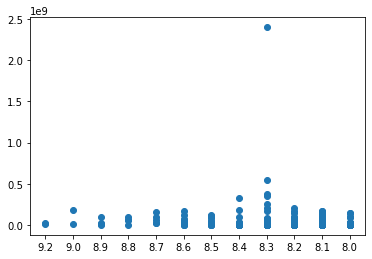

In [34]:
# Scatter plot of feature and target
plt.figure()
# Tracer le nuage de point avec la fonction "scatter"
plt.scatter(X, y)

In [35]:
# On affiche les dimension de X et y: 
print("Dimension de y: {}".format(y.shape))
print("Dimension de X: {}".format(X.shape))

# On redimensionne X et y: 
y = y.reshape(-1,1)
X = X.reshape(-1,1)
print("coupure")

#On Affiche les nouvelles dimensions des tableaux de cibles et d'attribus:
print("Size of y after reshaping: {}".format(y.shape))
print("Size of X after reshaping: {}".format(X.shape))

Dimension de y: (250,)
Dimension de X: (250,)
coupure
Size of y after reshaping: (250, 1)
Size of X after reshaping: (250, 1)


In [36]:
# Création d'une régression linéaire appelé "reg"
reg = LinearRegression()

# On définie l'espace de prédiction qui s'étend selon le maximum et le minimum de X:
prediction_space = np.linspace(8, 9.2)
#On redimmensionne en une matrice:
prediction_space = prediction_space.reshape(-1,1)

# On entraine le model avec les valeurs de X et de Y. 
reg.fit(X, y)

# Calcule des prédictions sur le tableau "prediction_space":
y_pred = reg.predict(prediction_space)

# Calcule et affiche la précision de "reg"
print(reg.score(X, y))

0.003876815274750922


# Utilisation de df_ml2

In [38]:
y = df_ml2['Budget']
X = df_ml2.drop('Budget', axis=1)

In [39]:
# On crée un ensemble d'entrainement et de test: 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# On instancie un classifieur knn avec 6 voisins: 
knn = KNeighborsClassifier(n_neighbors=6)

# On entraine le classifieur avec "fit":
knn.fit(X_train, y_train)

# On effectue les prédictions sur le modéle: 
y_pred = knn.predict(X_test)

# On génere la matrice de confusion et le rapport de classification: 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


ValueError: setting an array element with a sequence.